# So Sánh 2 Model trong Regression

## I. CÁC BƯỚC CHUẨN BỊ

### 1. Khai báo thư viện

In [3]:
import pandas as pd # Xử lý dữ liệu bảng (lọc nhóm, gộp, missing vaules)
import numpy as np # Tính toán với mảng, thống kê...
import matplotlib.pyplot as plt # Vẽ biểu đồ linh hoạt tùy biến
import seaborn as sns # Vẽ biểu đồ thống kê dựa vào matplotlib
import joblib # lưu và đọc các mô hình
from IPython.display import display

### 2. Nạp dữ liệu

In [1]:
import pandas as pd # Xử lý dữ liệu bảng (lọc nhóm, gộp, missing vaules)
housing_price_df = pd.read_csv("../../../dataset/HousingPrices-Amsterdam-August-2021.csv") # Sử dụng pandas và dùng read_csv để đọc dữ liệu csv
housing_price_df.head() # hiển thị 5 rows đầu tiên của dataset, head(default = 5)

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


**Nhận xét:**
- Cột "Unnamed:0" là cột đánh số thứ tự, cho nên chuyển cột này thành cột index. Trước khi chuyển thì cần phải thay đổi tên cột để dễ nhìn

In [2]:
# Change col name "Unnamed: 0" to "Unnamed" 
housing_price_df = housing_price_df.rename(columns={"Unnamed: 0": "Unnamed"})
# set col name "Unnamed" is an Index
housing_price_df.set_index(housing_price_df["Unnamed"], inplace= True) #inlace = True chỉnh trực tiếp trong dataset
housing_price_df.drop("Unnamed", axis = 1, inplace= True) # axis = 1: xét theo chiều ngang (đi qua các cột)
housing_price_df

,Address,Zip,Price,Area,Room,Lon,Lat
Unnamed,,,,,,,
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256


**Nhận xét:**
- Sau khi rename, set_index và drop cột để chuyển thì ta đã có được các cột hoàn chỉnh.

### 3. Phân tích dữ liệu 

#### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [65]:
# shape
print(f'+ Shape: {housing_price_df.shape}')
# types
print(f'+ Data Types: \n{housing_price_df.dtypes}')
# head, tail
print(f'+ Contents: ')
display(housing_price_df.head(5))
display(housing_price_df.tail(5))
# info
housing_price_df.info()

+ Shape: (924, 7)
+ Data Types: 
Address     object
Zip         object
Price      float64
Area         int64
Room         int64
Lon        float64
Lat        float64
dtype: object
+ Contents: 


,Address,Zip,Price,Area,Room,Lon,Lat
Unnamed,,,,,,,
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


,Address,Zip,Price,Area,Room,Lon,Lat
Unnamed,,,,,,,
920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268
924,"S. F. van Ossstraat 334, Amsterdam",1068 JS,300000.0,79,4,4.810678,52.355493


<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 1 to 924
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 57.8+ KB


***Nhận xét:**
+ Dữ liệu có 6 tính chất để phân lớp: $Address$, $Zip$, $Area$, $Room$, $Lon$ và $Lat$
+ Tổng số dòng dữ liệu là 924 dòng
+ Dữ liệu để phân lớp ở cột $Price$ 

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [66]:
has_null = housing_price_df.isnull().sum().any()
has_nan  = housing_price_df.isna().sum().any()
n_duplicated = housing_price_df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display(housing_price_df[housing_price_df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display(housing_price_df[housing_price_df.isna().any(axis=1)])
    

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True


,Address,Zip,Price,Area,Room,Lon,Lat
Unnamed,,,,,,,
74,"Falckstraat 47 A, Amsterdam",1017 VV,NaN,147,3,4.897454,52.360707
322,"Haarlemmerweg 705, Amsterdam",1067 HP,NaN,366,12,4.787874,52.383877
611,"Zeeburgerkade 760, Amsterdam",1019 HT,NaN,107,3,4.945022,52.369244
728,"Suikerplein 16, Amsterdam",1013 CK,NaN,81,3,4.880976,52.389623


+ Có giá trị Nan: True


,Address,Zip,Price,Area,Room,Lon,Lat
Unnamed,,,,,,,
74,"Falckstraat 47 A, Amsterdam",1017 VV,NaN,147,3,4.897454,52.360707
322,"Haarlemmerweg 705, Amsterdam",1067 HP,NaN,366,12,4.787874,52.383877
611,"Zeeburgerkade 760, Amsterdam",1019 HT,NaN,107,3,4.945022,52.369244
728,"Suikerplein 16, Amsterdam",1013 CK,NaN,81,3,4.880976,52.389623


**Nhận xét**:
+ Dữ liệu bị trùng có giá trị rỗng (NaN, Null)
+ Các dòng dữ liệu bị rỗng sẽ ở Room = 3 và 12

### 4. Tiền xử lý

In [67]:
# đếm số lượng nhà có 3 phòng
count_room_3 = (housing_price_df["Room"] == 3).sum()
display(f"Số nhà có 3 phòng: {count_room_3}")
count_room_12 = (housing_price_df["Room"] == 12).sum()
display(f"Số nhà có 12 phòng: {count_room_12}")

'Số nhà có 3 phòng: 333'

'Số nhà có 12 phòng: 1'

**Nhận xét:**
- Đối với phòng 3 do số lượng thiếu chỉ có 3 mà tổng số lượng ngôi nhà có room = 3 là 333, cho nên thay các dữ liệu thiếu bằng median.
- Room = 12 chỉ có duy nhất một dòng, điều này cho thấy tỷ lệ nhà có 12 phòng cực ít nên loại bỏ dòng này. 

In [68]:
# Giải quyết nhà có 3 phòng
cols_to_fill = ["Price"] # cột missing data
mask = (housing_price_df["Room"] == 3)
medians_r3 = housing_price_df.loc[mask, cols_to_fill].median(numeric_only=True) # chỉ tính với giá trị số
# chọn đúng dòng và cột cần fill và thực hiện gán giá trị NaN thành giá trị median đã tính trước đó.
housing_price_df.loc[mask, cols_to_fill] = housing_price_df.loc[mask, cols_to_fill].fillna(medians_r3)
# Giải quyết nhà có 12 phòng
housing_price_df = housing_price_df[housing_price_df["Room"] != 12].reset_index(drop=True) # sau khi xóa dòng thì điều chỉnh lại thứ tự index 0->n-1

In [69]:
has_null = housing_price_df.isnull().sum().any()
has_nan  = housing_price_df.isna().sum().any()
n_duplicated = housing_price_df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display(housing_price_df[housing_price_df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False


**Nhận xét:**
- Sau khi đã xử lý nhà có 3 phòng và 12 phòng thì dữ liệu không còn giá trị thiếu.

### 5. Mối tương quan giữa các tính chất (Correlations)

In [70]:
housing_price_df.dtypes

Address     object
Zip         object
Price      float64
Area         int64
Room         int64
Lon        float64
Lat        float64
dtype: object

**Nhận xét:**
- Trong bộ dữ liệu có 7 cột, tuy nhiên trong xây dựng mô hình chỉ hiểu các kiểu dữ liệu số. 

In [71]:
housing_price_df_int = housing_price_df[["Price", "Area","Room", "Lon","Lat"]]
housing_price_df_int.head()

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
3,580000.0,128,6,4.789928,52.343712
4,720000.0,138,5,4.902503,52.410538


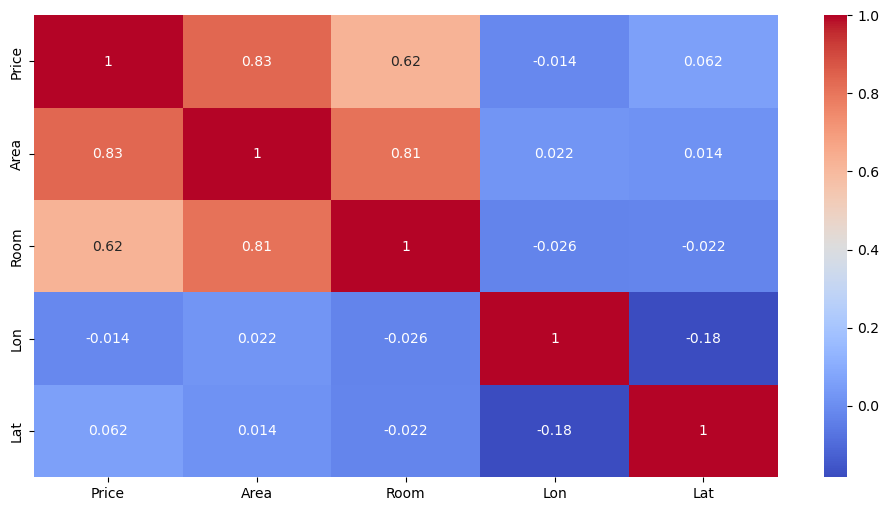

In [72]:
plt.figure(figsize=(12, 6)) #Create canvas
sns.heatmap(housing_price_df_int.corr(), annot= True, cmap="coolwarm") # annot để hiển thị số và cmap để hiển thị màu
plt.show() 

**Nhận xét:**
- Trong sơ đồ heatmap, các cột $Area$ $(0.83)$, $Room$ $(0.62)$ có tương quan mạnh với $Price$. Cho nên 2 cột này là yếu tố chính ảnh hưởng đến giá nhà.

### 6. Hiển thị nhiều tính chất (Multivariate Plots)

array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Area', ylabel='Price'>,
        <Axes: xlabel='Room', ylabel='Price'>,
        <Axes: xlabel='Lon', ylabel='Price'>,
        <Axes: xlabel='Lat', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='Area'>,
        <Axes: xlabel='Area', ylabel='Area'>,
        <Axes: xlabel='Room', ylabel='Area'>,
        <Axes: xlabel='Lon', ylabel='Area'>,
        <Axes: xlabel='Lat', ylabel='Area'>],
       [<Axes: xlabel='Price', ylabel='Room'>,
        <Axes: xlabel='Area', ylabel='Room'>,
        <Axes: xlabel='Room', ylabel='Room'>,
        <Axes: xlabel='Lon', ylabel='Room'>,
        <Axes: xlabel='Lat', ylabel='Room'>],
       [<Axes: xlabel='Price', ylabel='Lon'>,
        <Axes: xlabel='Area', ylabel='Lon'>,
        <Axes: xlabel='Room', ylabel='Lon'>,
        <Axes: xlabel='Lon', ylabel='Lon'>,
        <Axes: xlabel='Lat', ylabel='Lon'>],
       [<Axes: xlabel='Price', ylabel='Lat'>,
        <Axes: xlabel='Area', ylab

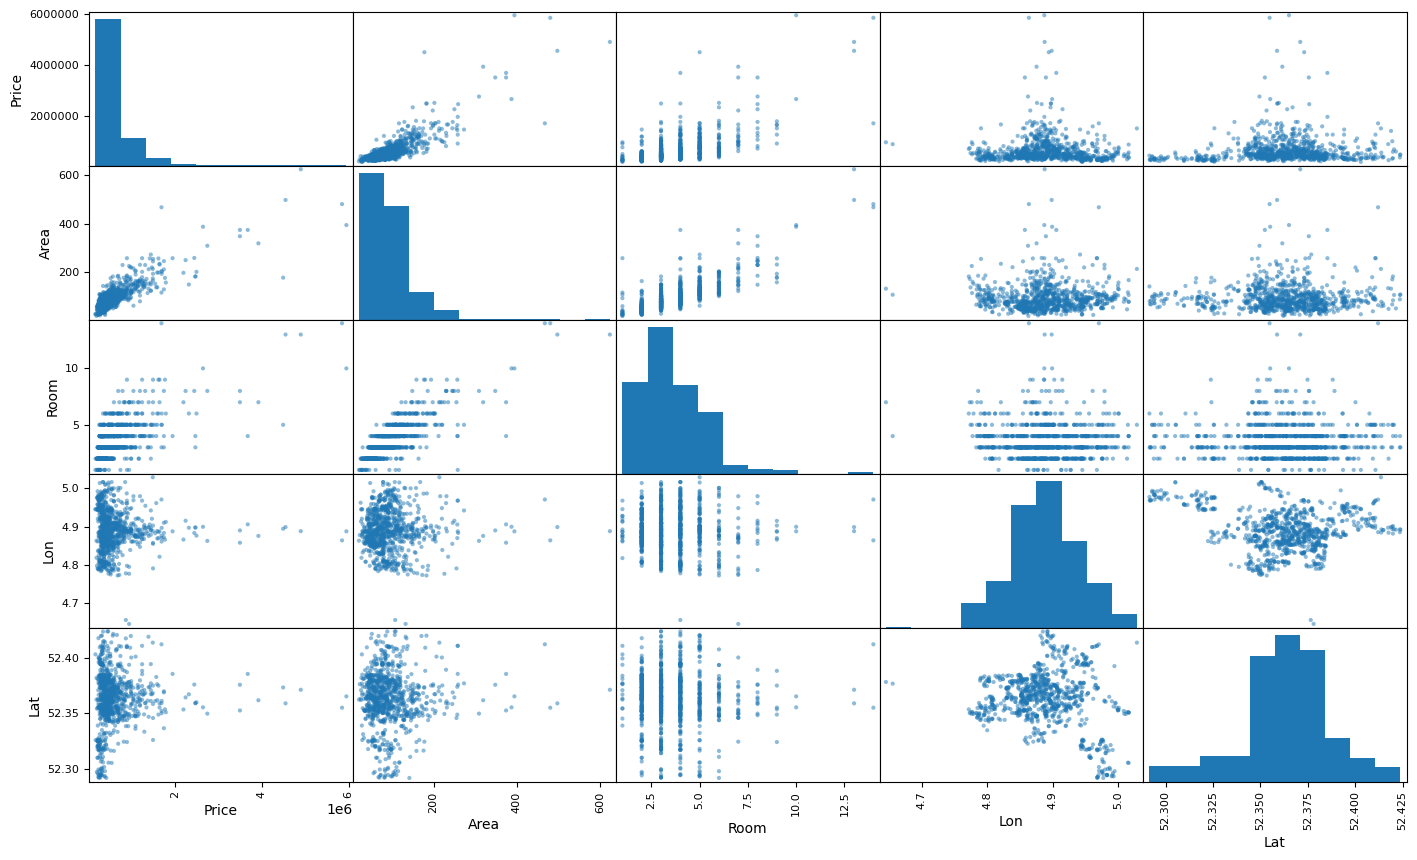

In [73]:
pd.plotting.scatter_matrix(housing_price_df_int, figsize=(17,10))

**Nhận xét:**
- Với việc hiển thị nhiều tính chất thì càng làm rõ mối tương quan giữa các biến ảnh hưởng đến giá nhà.

## II. Thực hiện xây dựng model

### 1. Lựa chọn cột features và target

In [74]:
# Chọn các cột feature và target phù hợp
X = housing_price_df_int[["Area","Room"]] #features
y = housing_price_df_int["Price"] #target

### 2. Tách dataset để train và test 

In [75]:
from sklearn.model_selection import train_test_split # tách dữ liệu tập train/test
# tách test_size (độ rộng tập test) là 20% của toàn bộ dữ liệu, random_state giúp giữ nghiên dữ liệu sau khi tách, giúp đảm bảo độ chính xác
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [76]:
# show X train
X_train.head()

,Area,Room
97,68,3
227,80,2
692,75,3
587,57,2
883,87,4


In [77]:
# show y train
y_train.head()

97     425000.0
227    520000.0
692    675000.0
587    345000.0
883    650000.0
Name: Price, dtype: float64

### 3. Preprocess

In [18]:
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# tránh trường hợp thay đổi tên cột ở X
num_sel = selector(dtype_include=np.number) # chọn cột số 
cat_sel = selector(dtype_exclude=np.number) # chọn cột không phải số

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler())
])
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot",  OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_sel),
    ("cat", categorical_pipe, cat_sel),
])

### 3. Khởi tạo tham số cho model

In [79]:
from sklearn.linear_model import LinearRegression # model Linear
from sklearn.ensemble import RandomForestRegressor # model RandomForest

# tạo pipline đóng gói toàn bộ model
def make_pipe(model):
    return Pipeline([("prep", preprocess), ("model", model)]) # prep học tham số tiền xử lý từ X_train (median để điền khuyết) và model học quy luật dự đoán

# cài đặt parameter cho model, 
models = {
    "RandomForest": RandomForestRegressor(max_depth=3, n_jobs=-1, n_estimators= 300),
    "Linear":       LinearRegression(fit_intercept=True, copy_X=False, positive=False)
     #
}

**Nhận xét:**
- Model Linear:
    - fit_intercept=True sẽ thêm hệ số lệch (bias), chỉ False khi dữ liệu có cột bị bias tuy nhiên có thể giảm R2
    - copy_X = True để sao chép dữ liệu X, giúp X không bị thay đổi trước khi model học. Tuy nhiên nếu Flase sẽ tiết kiệm RAM nhưng X sẽ bị ghi đè
    - positive=False chuyển hệ số β luôn dương khi có ràng buộc miền giá trị, dễ diễn giải nhưng có thểm giảm R2

- Model RandomForest:
    - n_estimators là số lượng cây dược random, số lượng càng nhiều sẽ giảm phương sai nhưng tốn thời gian và RAM.
    - n_jobs để quy định tuyến trình chạy khi fit/predict:
        - n_jobs = 1 or None (chạy 1 luồng) dành cho Dataset nhỏ và chạy rất nhanh.
        - n_jobs = -1 (dùng toàn bộ core) khi muốn giảm thiểu thời gian học số lượng nhiều của model
        - n_jobs = n (n > 1) chỉ sài n core CPU, giúp giới hạn và nhẹ máy
        - n_jobs = -n (n < -1) chừa vài core để tránh việc máy quá tải

### 4. Đánh giá model

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rows = []
for name, mdl in models.items():
    pipe = make_pipe(mdl).fit(X_train, y_train) # train model
    y_pred = pipe.predict(X_test) # kết quả sau khi train
    
    # Đánh giá
    mae = mean_absolute_error(y_test, y_pred) #y_test gia tri thuc, y_pre cho danh gia
    mse = mean_squared_error(y_test, y_pred) # loss model (*) > mae = dao ham () -> Xác định một biến nó tăng/ giảm ở một thời điểm nhất định 
    rmse = np.sqrt(mse) # root mean square
    r2 = r2_score(y_test, y_pred)
    
    #
    rows.append({
    "Model": name,
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2": r2
    })
      
results_df = (pd.DataFrame(rows).loc[:, ["Model", "MAE", "MSE", "RMSE", "R2"]].sort_values("RMSE", ascending=True))
# xuat
with pd.option_context("display.float_format", lambda x: f"{x:,.3f}"):
    display(results_df)

,Model,MAE,MSE,RMSE,R2
1,Linear,"181,496.387","64,945,961,457.735","254,844.975",0.793
0,RandomForest,"181,933.823","71,085,380,566.281","266,618.418",0.774


In [ ]:
def predict_price(area_m2, rooms):
    X_new = pd.DataFrame({"Area": [area_m2], "Room": [rooms]})
    # ưu tiên dùng final_pipe (được lưu sau khi chọn model tốt nhất). Nếu chưa có, thử 'pipe' còn tồn tại từ phiên huấn luyện trước đó.
    try:
        return final_pipe.predict(X_new)
    except NameError:
        try:
            return pipe.predict(X_new)
        except NameError:
            raise NameError('Không tìm thấy pipeline đã train. Vui lòng chạy cell huấn luyện/đánh giá trước.')

# ví dụ dùng hàm
print(predict_price(100,3))

[688328.96534247]


### 5. Lưu model

In [ ]:
import joblib

# Lưu model tốt nhất dựa trên results_df (theo RMSE).
# results_df được tạo trong cell đánh giá mô hình. Nếu chưa có, yêu cầu chạy lại cell đánh giá.
if 'results_df' in globals() and not results_df.empty:
    best_name = results_df.sort_values('RMSE', ascending=True).iloc[0]['Model']
    print('Best model by RMSE:', best_name)
    best_mdl = models[best_name]
    # train final pipeline on full training set (X_train, y_train must exist)
    final_pipe = make_pipe(best_mdl).fit(X_train, y_train)
    save_path = '../../../models/regression.joblib'
    joblib.dump(final_pipe, save_path)
    print(f'Saved: {save_path} (model: {best_name})')
else:
    raise RuntimeError('results_df không tồn tại hoặc rỗng. Vui lòng chạy cell đánh giá trước khi lưu model.')


Saved: model/regressor.joblib


Imputing Missing Values

In [4]:
housing_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 1 to 924
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 57.8+ KB


In [ ]:
has_null = housing_price_df.isnull().sum().any()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display(housing_price_df[housing_price_df.isnull().any(axis=1)])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True


,Address,Zip,Price,Area,Room,Lon,Lat
Unnamed,,,,,,,
74,"Falckstraat 47 A, Amsterdam",1017 VV,NaN,147,3,4.897454,52.360707
322,"Haarlemmerweg 705, Amsterdam",1067 HP,NaN,366,12,4.787874,52.383877
611,"Zeeburgerkade 760, Amsterdam",1019 HT,NaN,107,3,4.945022,52.369244
728,"Suikerplein 16, Amsterdam",1013 CK,NaN,81,3,4.880976,52.389623


In [48]:
# Đảm bảo cột Price là số (nếu có ký tự lạ sẽ bị chuyển thành NaN và sẽ được impute)
housing_price_df['Price'] = pd.to_numeric(housing_price_df['Price'], errors='coerce')
# Lưu bản gốc để so sánh
price_original = housing_price_df['Price'].copy()
print("Số lượng giá trị thiếu trước khi xử lý:", price_original.isna().sum())

Số lượng giá trị thiếu trước khi xử lý: 4


In [16]:
# 2) Phương pháp thủ công: median + fillna (chuẩn Pandas)
# ======================================================
median_manual = price_original.median(skipna=True)
price_manual = price_original.fillna(median_manual)
print("Số lượng giá trị thiếu sau khi xử lý (thủ công):", price_manual.isna().sum())

Số lượng giá trị thiếu sau khi xử lý (thủ công): 0


In [ ]:
# 3) Phương pháp chuẩn scikit-learn: SimpleImputer(median)
# =======================================================
imputer = SimpleImputer(strategy='median')
price_imputed_array = imputer.fit_transform(housing_price_df[['Price']]) 
# Gán lại thành Series để so sánh dễ
price_sklearn = pd.Series(price_imputed_array.ravel(), index=housing_price_df.index, name='Price')
print("Số lượng giá trị thiếu sau khi xử lý (scikit-learn):", price_sklearn.isna().sum())

Số lượng giá trị thiếu sau khi xử lý (scikit-learn): 0


In [21]:
# 4) So sánh 2 phương pháp
# ===========================
median_sklearn = float(imputer.statistics_[0])  # median mà SimpleImputer học được
print("Median (manual) :", median_manual)
print("Median (sklearn):", median_sklearn)

Median (manual) : 467000.0
Median (sklearn): 467000.0


In [42]:
# 5) Hiển thị một phần DataFrame để quan sát
# ==========================================
# Ghép 3 cột: gốc / thủ công / sklearn để so sánh trực quan
compare_df = pd.DataFrame({
    'Price_original': price_original,
    'Price_fillna_median_manual': price_manual,
    'Price_imputer_median_sklearn': price_sklearn
})


In [46]:
display("\n--- 10 dòng đầu để so sánh ---")
display(compare_df.head(10))

'\n--- 10 dòng đầu để so sánh ---'

,Price_original,Price_fillna_median_manual,Price_imputer_median_sklearn
Unnamed,,,
1,685000.0,685000.0,685000.0
2,475000.0,475000.0,475000.0
3,850000.0,850000.0,850000.0
4,580000.0,580000.0,580000.0
5,720000.0,720000.0,720000.0
6,450000.0,450000.0,450000.0
7,450000.0,450000.0,450000.0
8,590000.0,590000.0,590000.0
9,399000.0,399000.0,399000.0
